#                         Projet Math-Info Choix du pas de temps



#### Victor Gautier et Hugo Tissot

## I. Comparaison de deux méthodes de résolution d'équation différentielle

### I.1) Méthode d'Euler explicite d'ordre 1

On souhaite mettre au point un programme de résolution d'équation différentielle, on procédera dans un premier temps à l'implémentation de la méthode d'Euler explicite

In [15]:
#Importation des modules qui nous intéressent
import numpy as np
import matplotlib.pyplot as plt
from math import *
%matplotlib inline

On s'intéresse ici au cas simple où notre système est régi par l'équation différentielle : ẋ = -x 

Pour une condition initiale x(t=0) = 1 on connait la solution exacte : x(t) = exp(-t)

In [3]:
def f(x,t) :
    return np.array(-x)

def g(t) :
    return exp(-t)

In [4]:
#Implémentation de la méthode d'Euler explicite
def solve_euler_explicit(f,x0,dt=0.1,t0=0,tf=50) :
    T = [t0]
    X = [x0]
    while T[-1] < tf :
        X.append(f(X[-1],T[-1])*dt+X[-1])
        T.append(T[-1]+dt)

    return (np.array(T),np.array(X).T)

### I.2) Méthode de Heun d'ordre 2

A présent on souhaite comparer l'efficacité de résolution de la méthode d'Euler à celle de la méthode d'Heun théoriquement plus précise

In [5]:
#Implémentation de la méthode d'Heun
def solve_heun(f,x0,dt,t0,tf) :
    T = [t0]
    X = [x0]
    while T[-1] < tf :
        y = f(X[-1],T[-1])*dt + X[-1]
        X.append((f(X[-1],T[-1])+f(y,T[-1]+dt))/2*dt + X[-1])
        T.append(T[-1]+dt)
    return (np.array(T),np.array(X).T)

Dans un premier temps on va comparer le tracé des solutions par rapport à la solution exacte pour les 2 méthodes

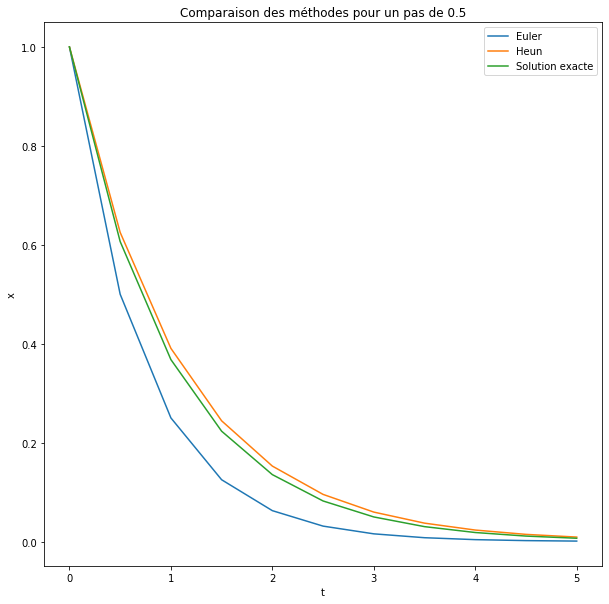

In [6]:
x0 = np.array([1])

(T1,X1) = solve_euler_explicit(f,x0,0.5,0,5)
(T2,X2) = solve_heun(f,x0,0.5,0,5)

#On forme la liste des x pour la solution exacte
G = []
for t in T1 :
    G.append(g(t))

plt.figure(figsize = (10,10))
plt.plot(T1,X1[0] ,label="Euler")
plt.plot(T2,X2[0],label = "Heun")
plt.plot(T1,G,label = "Solution exacte" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Comparaison des méthodes pour un pas de 0.5")
plt.axis()
plt.show()

On remarque effectivement que la méthode d'Heun d'ordre 2 est plus proche de la solution exacte que la méthode d'Euler explicite

On souhaite également mettre en évidence l'importance du pas (ici fixe) dans la précision des simulations.
Pour se faire voici un programme donnant l'évolution de l'erreur maximale en valeur absolue par rapport à la solution exacte en fonction de différents pas de temps utilisés pour les simulations d'Euler et de Heun.

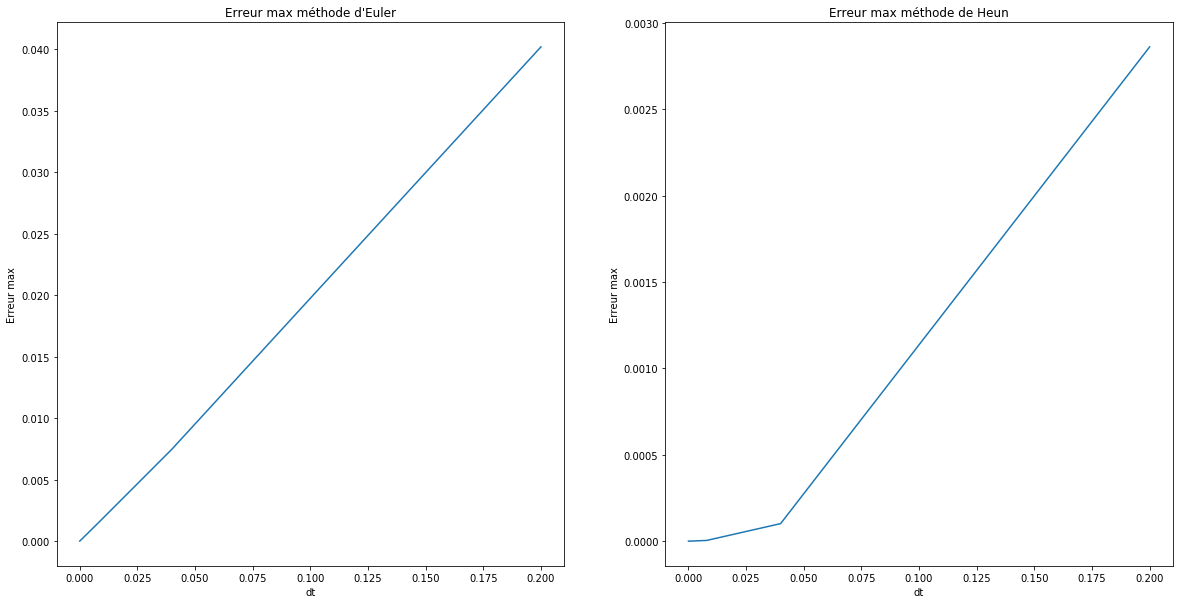

In [7]:
les_dt = []
max_erreur = []

for i in range (1,7) :
    dt = 1/(5**i)
    les_dt.append(dt)
    (T,X) = solve_euler_explicit(f,x0,dt,0,20)
    erreur = []
    for j in range(len(T)) :
        erreur.append(abs(g(T[j])-X[0][j]))
    max_erreur.append(max(erreur))

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(les_dt,max_erreur)
plt.xlabel("dt")
plt.ylabel("Erreur max")
plt.title("Erreur max méthode d'Euler")
plt.axis()



x0 = np.array([1])

les_dt = []
max_erreur = []

for i in range (1,7) :
    dt = 1/(5**i)
    les_dt.append(dt)
    (T,X) = solve_heun(f,x0,dt,0,20)
    erreur = []
    for j in range(len(T)) :
        erreur.append(abs(g(T[j])-X[0][j]))
    max_erreur.append(max(erreur))


plt.subplot(1,2,2)
plt.plot(les_dt,max_erreur)
plt.xlabel("dt")
plt.ylabel("Erreur max")
plt.title("Erreur max méthode de Heun")
plt.axis()
plt.show()

Ces tracés prouvent bien que l'erreur max avec la méthode de Heun est toujours largement inférieure à celle de la méthode d'Euler pour un pas donné (plus de 10 fois inférieure) !
On remarque également un comportement linéaire pour les 2 méthodes même si la méthode d'Heun présente une rupture de pente assez marquée pour de très faibles pas de temps, la précision étant déjà de l'ordre de $10^{-5}$. On peut supposer qu'il pourrait en être de même pour la méthode d'Euler si on travaillait avec des pas de temps encore plus faible, malheureusement le temps de simulation nous limite pour une étude plus approfondie (le pas de temps minimale dans ce programme est de l'ordre de $10^{-5}$).

## II. Adapatation du pas de temps 

### II.1) Expression de l'erreur locale pour Euler explicite 

$\text{On pose: }\tilde{x}(t)=x^j+\int_{t_{j}}^{t} f(s,\tilde{x}(s))\,\mathrm{d}s\text{ pour tout }t\in[t_{j},t_{j+1}[$

$\text{Par définiton }e^{j+1}=\tilde{x}(t_j)+\int_{t_{j}}^{t_{j+1}} f(s,\tilde{x}(s))\,\mathrm{d}s-x^{j+1}\\
\text{or, }\tilde{x}(t_{j+1})=\tilde{x}(t_j)+\int_{t_{j}}^{t_{j+1}} f(s,\tilde{x}(s))\,\mathrm{d}s\\
\text{et, }x^{j+1}=\tilde{x}(t_j)+\Delta t_{j}f(t_j,\tilde{x}(t_j))\\
\text{donc, }e^{j+1}=-\Delta t_{j}f(t_j,\tilde{x}(t_j))+\tilde{x}(t_{j+1})-\tilde{x}(t_j)$


$\text{En effectuant un développement limité à l'ordre 2 en }\Delta t_j\text{, on obtient: }\\
\tilde{x}(t_{j}+\Delta t_{j})=\tilde{x}(t_j)+\Delta t_j f(t_j,\tilde{x}(t_j))+\ddot{\tilde{x}}(t_j)\frac{{\Delta t_j}^2}{2}+O({\Delta t_j}^3)\\
\text{donc,}\;e^{j+1}=\ddot{\tilde{x}}(t_j)\frac{{\Delta t_j}^2}{2}+O({\Delta t_j}^3)\;\;(1)$

$\text{D'autre part, en effectuant un développement limité à l'ordre 1 en }\Delta t_j\text{, on obtient: }\\
f(t_j+\Delta t_j,\tilde{x}(t_j)+\Delta t_{j}\,f(t_j,\tilde{x}(t_j)))-f(t_j,\tilde{x}(t_j))=\Delta t_j \,(\partial_1 f(t_j,\tilde{x}(t_j))+f(t_j,\tilde{x}(t_j))\,\partial_2 f(t_j,\tilde{x}(t_j)))+ O({\Delta t_j}^2)$

$\text{or, }\ddot{\tilde{x}}(t_j)=\partial_1 f(t_j,\tilde{x}(t_j))+f(t_j,\tilde{x}(t_j))\,\partial_2 f(t_j,\tilde{x}(t_j))\;
\text{car, }\;\dot{\tilde{x}}(t)=f(t,\tilde{x}(t))\;(2)$

$\text{On a donc avec (1), }\;e^{j+1}=\Delta t_j \frac{f(t_{j+1},x^{j+1})-f(t_j,x^{j})}{2}+O({\Delta t_j}^3)$

$\text{En prenant la norme, il vient: }\\
\|e^{j+1}\|=\Delta t_j \frac{\|f(t_{j+1},x^{j+1})-f(t_j,x^{j})\|}{2}+O({\Delta t_j}^3)$

$\text{Les relations (1) et (2) nous donnent également }\;e^{j+1}=O({\Delta t_j}^2)\,\text{car }\ddot{\tilde{x}}\;\text{est bornée puisqu'elle est continue sur [0,T] (f est }C^1\text{).}$

### II. 2) Stratégie d'adaptation du pas 

#### a) Calcul du nouveau pas

$\text{Pour adapter le pas pour le calcul du point suivant, on prend comme condition }\|e^{j+2}\|\leq Tol_{abs}$

$\text{On a donc: }\|e^{j+2}\|\approx Tol_{abs}\,\text(3)$

$\text{Ainsi, }\left \|\frac{e^{j+1}}{e^{j+2}}\right \|\approx \frac{{\Delta t_j}^2}{{\Delta t_{new}}^2}\text{ d'après ce qui précède.}\\
\text{En utilisant (3), il vient:}\quad \Delta t_{new}\approx \Delta t_j \sqrt{\frac{Tol_{abs}}{\|e^{j+1}\|}}$

#### b) Etude du nouveau solveur 

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

In [11]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x,t)
            x_back = x_next - dt * f(x_next,t) #
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2) # linalg.norm(x_back-x)/2 est la norme de l'erreur locale 
            dt = 0.9 * dt * sqrt(ratio_abs_error) # 0.9 est une marge prise par rapport à la formule précédente (dt est grand pour une erreur locale faible et petit dans le cas inverse)
            if dt < dtmin: # on ne veut pas avoir dt trop petit à cause du temps de calcul
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: # on ne veut pas avoir dt trop grand devant dtmax 
                dt = dtmax/2 # pour avoir plusieurs points de calcul intermédiaires entre ti=0 et ti=dtmax
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax , dt2DT<=0 
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x,t) # on calcule le prochain couple (t_next,x_next) tel que t_next=ts[-1]+dtmax; on remet ti à 0 
        ts = vstack([ts,t_next])# on ajoute t_next à la liste des temps 
        xs = vstack([xs,x_next])# on ajoute x_next à la liste des x 
        t, ti, x = t_next, ti_next, x_next # on réinitialise les variables pour partir du nouveau point calculé  
    return (ts, xs.T)

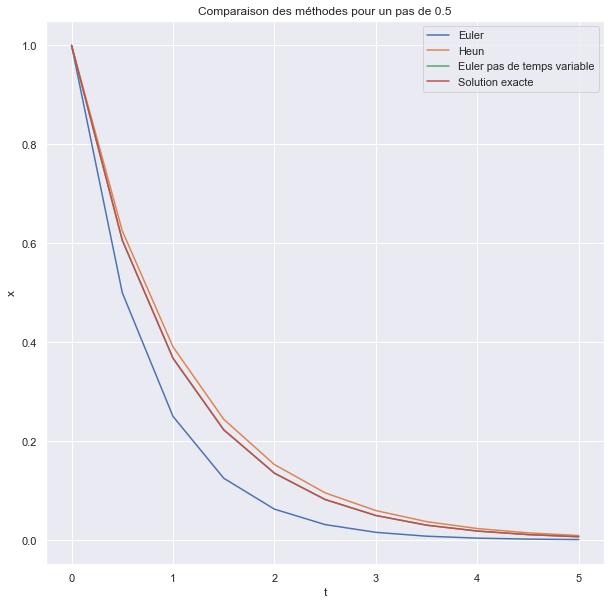

In [16]:
def f(x,t) :
    return np.array(-x)

def g(t) :
    return exp(-t)

x0 = np.array([1])

(T1,X1) = solve_euler_explicit(f,x0,0.5,0,5)
(T2,X2) = solve_heun(f,x0,0.5,0,5)
(T3,X3) = solve_ivp_euler_explicit_variable_step(f, 0, x0, 5, dtmin = 1e-16, dtmax = 0.5, atol = 1e-6) 

#On forme la liste des x pour la solution exacte
G = []
for t in T1 :
    G.append(g(t))

plt.figure(figsize = (10,10))
plt.plot(T1,X1[0] ,label="Euler")
plt.plot(T2,X2[0],label = "Heun")
plt.plot(T3,X3[0], label = "Euler pas de temps variable")
plt.plot(T1,G,label = "Solution exacte" )
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Comparaison des méthodes pour un pas de 0.5")
plt.axis()
plt.show() 



On remarque que la solution d'Euler avec le pas variable est parfaitement superposée avec la solution exacte. Elle donc beaucoup plus efficace que les deux autres méthodes. 